#**Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**


## Semana 1 - Introdução ao Aprendizado de Máquinas

### Aula 01 - Introdução aos problemas de aprendizado de máquinas



In [1]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


Etapas de construção de um modelo de ML:
1. Formulação do problema
2. Seleção e adaptação do banco de dados
3. Pré-processamento do banco de dados
4. Separação do banco de dados em dados de treinamento e validação
5. Ajuste do modelo com os dados de treinamento
6. Validação do modelo e estimativa de desempenho com os dados de validação
7. Implementação do modelo para aplicação

#### 1. Formulação do problema

*Estimar o valor médio das casas em um distrito da Califórnia, dado um determinado conjunto de dados e características deste distrito.*

Fonte: https://www.kaggle.com/camnugent/california-housing-prices

*Variáveis do banco de dados:*

- longitude: *Longitude*
- latitude - *Latitude*
- housing_median_age - *Idade média das construções no quarteirão*
- total_rooms - *Número de cômodos no quarteirão*
- total_bedrooms - *Número de quartos no quarteirão*
- population - *Número de pessoas que vivem no quarteirão*
- households - *Número de famílias vivendo no mesmo quarteirão*
- median_income - *Renda média mensal do quarteirão em que a casa está situada (medida em dezenas de milhares de dólares)*
- median_house_value (target) - *Valor médio das casas do quarteirão em que a casa está situada (em dólares)* 
- ocean_proximity - *Proximidade da casa do oceano/mar*

#### 2. Seleção do banco de dados

In [2]:
# Importar os dados do banco de dados

path = './housing.csv'

df_housing = pd.read_csv(path)
print('Dataset carregado!')

df_housing.head()

Dataset carregado!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY




---


---


---


---


---


---



### Aula 02 - Tipos de dados e tratamento de entradas



#### Tipos de dados: 
1. Qualitativos
 * Nominal 
 * Ordinários

2. Quantitativos
 * Discreto
 * Contínuo

In [3]:
# Conhecendo o banco de dados
## Verificar se foi importado corretamente
df_housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
## Verificar informacoes gerais sobre as variaveis do dataframe
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Variável categórica : 'ocean_proximity'

In [5]:
df_housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df_housing.loc[lambda x: x['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


#### Ferramentas para exploração de dados:



##### 1. Ferramentas descritivas
  * Medidas de tendências
    * Média
    * Mediana
    * Moda
 * Medidas de dispersão
    * Intervalo
    * Desvio padrão
 * Distribuição das frequências
 * Histogramas

In [7]:
# Medidas de tendencia e dispersao
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


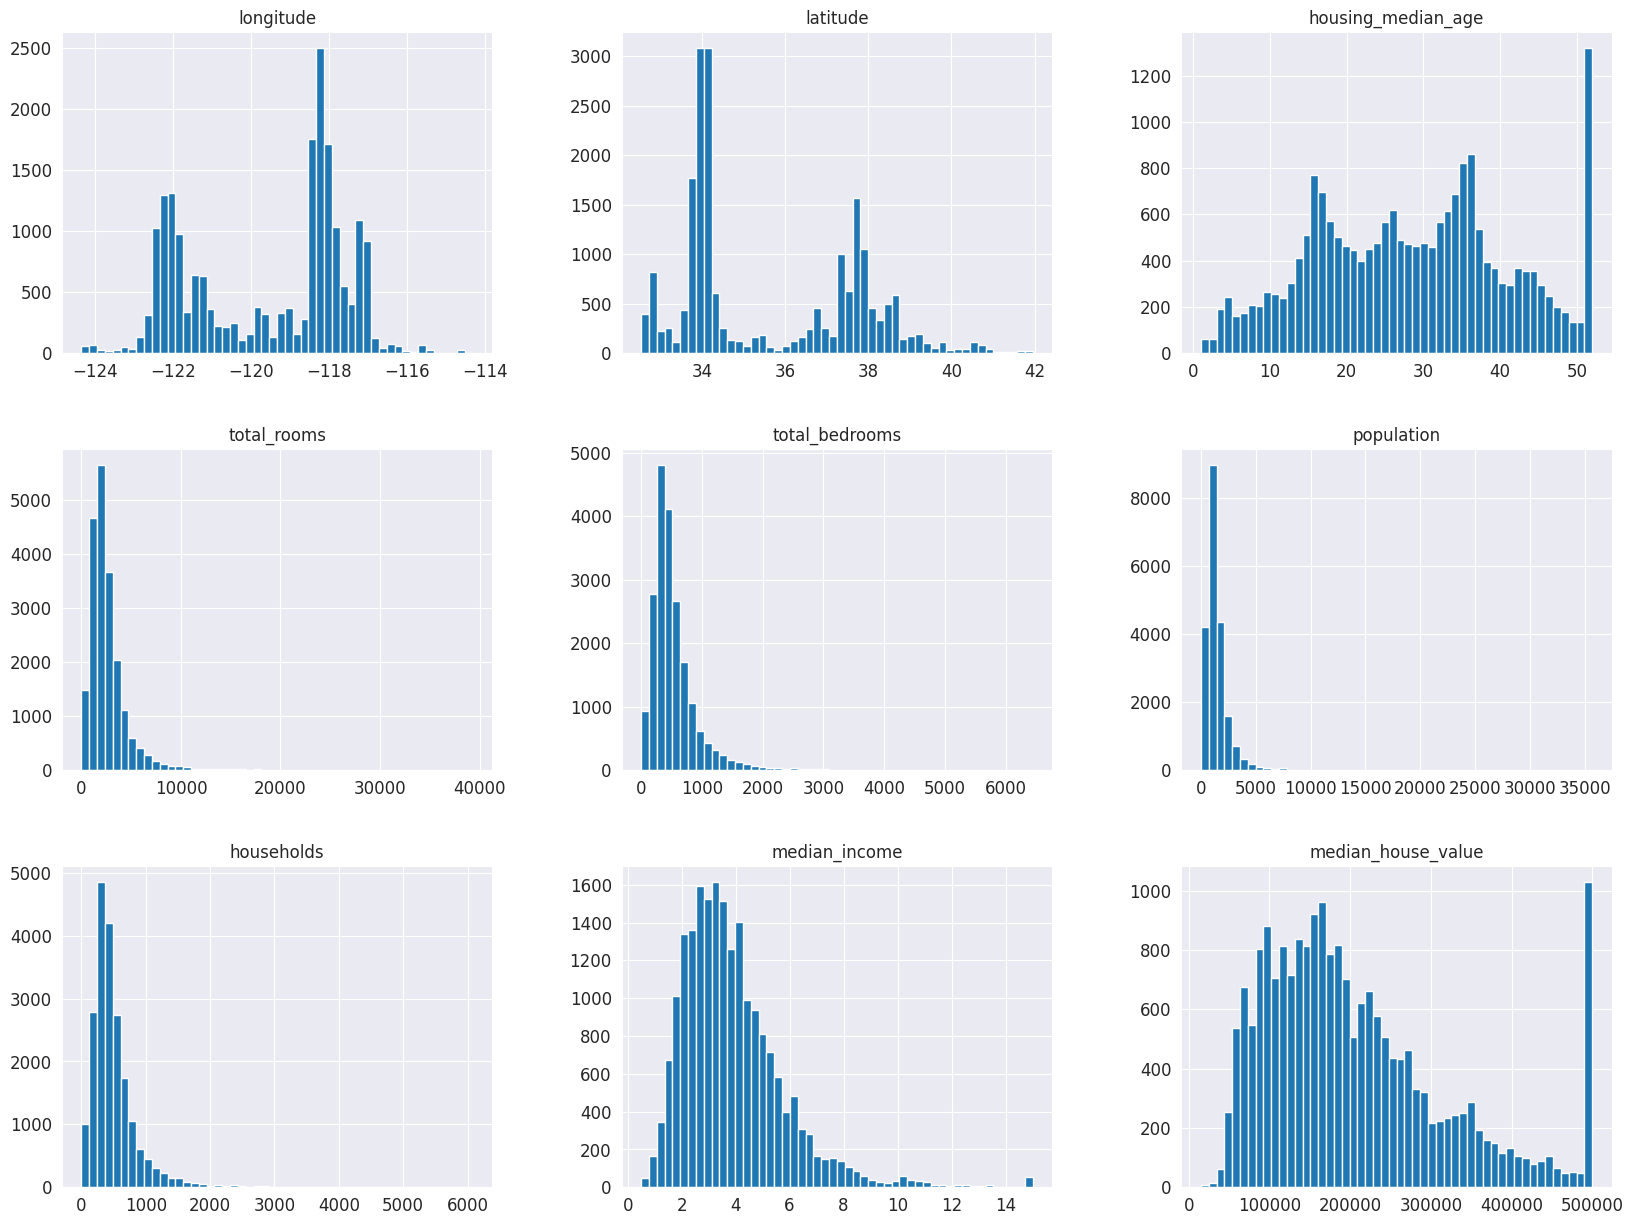

In [8]:
# Distribuicao das frequencias
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

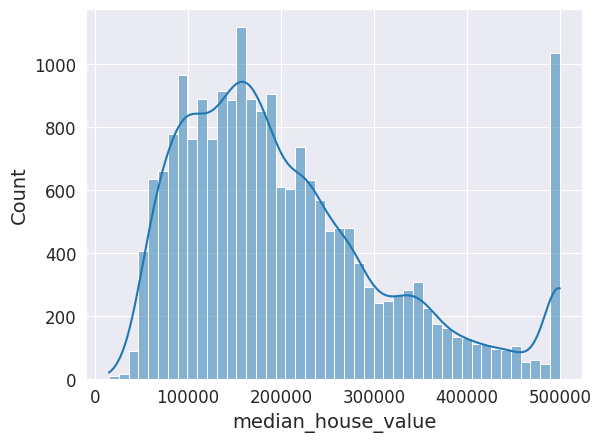

In [9]:
sns.histplot(data=df_housing,x='median_house_value',kde=True)


##### 2. Ferramentas de inferência
 * Teste de hipótese
 * Análise da variância (ANOVA)
 * Teste de chi-quadrado
 * Regressão linear
 
 ---



---


---


---


---


---


---



### Aula 03 - Relação entre variáveis e extração de características

#### Explorando os dados do problema


##### 1. Seleção das variáveis/características (feature selection)
 * Correlação entre as variáveis de entrada e saída
    * Análise gráfica
    * Coeficiente de correlação linear

<Axes: xlabel='longitude', ylabel='latitude'>

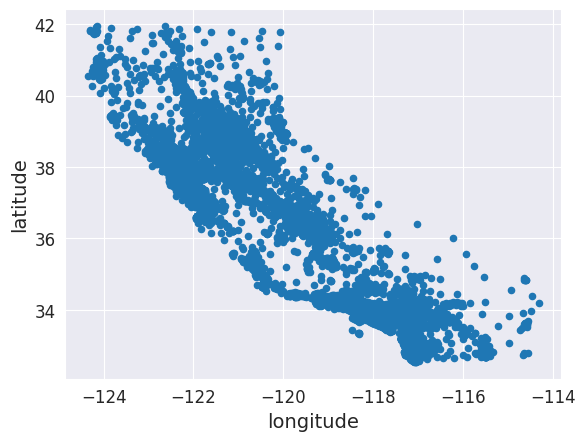

In [10]:
# Grafico com as posicoes geograficas das casas
df_housing.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

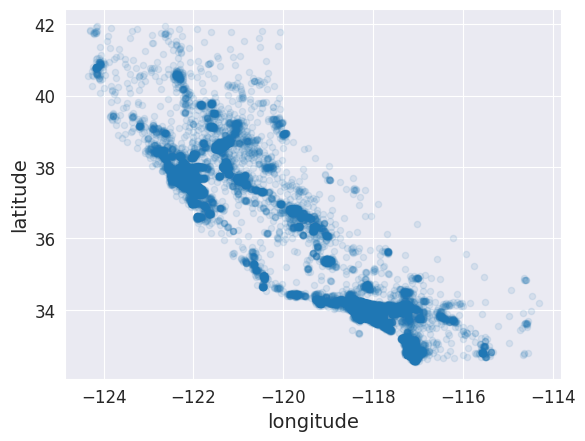

In [11]:
# Grafico com as posicoes geograficas das casas e marcadores com 10% da cor
df_housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

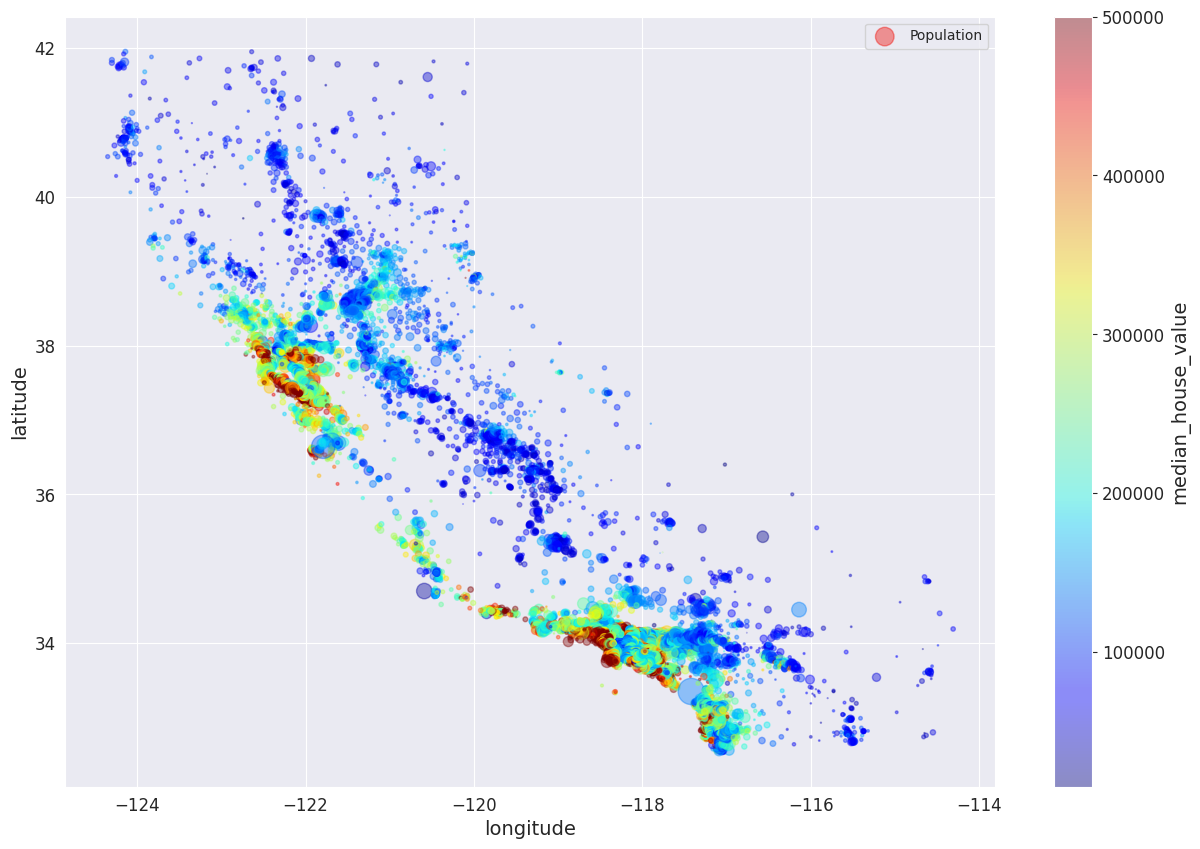

In [12]:
# Grafico com as posicoes geograficas das casas e marcadores com 40% da cor e modulados pelo 'population'/100 e coloridos de acordo com o valor das casas
df_housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4, # posicao geografica
                s=df_housing['population']/100, label='Population', figsize=(15,10), # tamanho do marcado de acordo com a media da populacao no quarteirao
                c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True) # cor do marcado de acordo com o valor das casas
plt.legend()

In [13]:
# (Extra) Dispersao das amostras com o mapa da California 

import folium
from folium.plugins import MarkerCluster

df_aux = df_housing
map_cahousing = folium.Map(location=[df_aux['latitude'].median(), df_aux['longitude'].median()],
                 zoom_start=6,zoom_control=False, width=800, height=500)

marker_cluster = MarkerCluster().add_to(map_cahousing)

for _, location_info in df_aux.loc[0:,:].iterrows(): #retirar o limite de amostras para plotar com todos os pontos
    folium.Marker([location_info['latitude'], location_info['longitude']], 
                    popup=folium.Popup(f"House value: U${location_info['median_house_value']}",max_width=500),
                    icon=folium.Icon(prefix='fa',icon='fa-house'),
                    overlay=True).add_to(marker_cluster)
    
map_cahousing

ModuleNotFoundError: No module named 'folium'

In [ ]:
# Matriz de correlacao 
corr_matrix = df_housing.corr()
corr_matrix

In [ ]:
# Correlacao das entradas com a saída desejada
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
# Graficos de dispersao entre as variaveis com melhores correlacoes
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df_housing[attributes],figsize=(20,15))

In [ ]:
df_housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,figsize=(20,15))

##### 2. Tratamento de variáveis categóricas

###### Transformação de variáveis categóricas em binárias (dummy)
 * **Cuidado ao transformar categóricas ordinárias**


In [ ]:
# Transformando variaveis categoricas

df_housing_cat = df_housing[['ocean_proximity']] #repassa o vetor com os indices
df_housing_cat.value_counts()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder #scikit-learn sera nossa biblioteca principal na disciplina. Muitos metodos estao implementados para serem utilizados
ordinal_encoder = OrdinalEncoder()
df_housing_cat_encoded = ordinal_encoder.fit_transform(df_housing_cat)
df_housing_cat_encoded

In [ ]:
ordinal_encoder.categories_

*Qual o problema aqui?*
- As categorias ficam ordinárias!


In [ ]:
#One Hot Encoding (variaveis dummies)
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_housing_cat_1hot = cat_encoder.fit_transform(df_housing_cat)
df_housing_cat_1hot
# cria uma matriz esparca com as variaveis binarias

In [ ]:
#visualizado a matriz esparca
df_housing_cat_1hot.toarray()

In [ ]:
# categorias transformadas com o OneHotEncoder
cat_encoder.categories_

######  Remoção de variáveis que não acrescentam informações ao modelo
+  Variáveis com apenas um valor
+  Variáveis com muitos dados ausentes

In [ ]:
# Identificando variaveis com dados ausentes ou invalidos
df_housing.describe()

In [ ]:
# Tres formas de fazer o tratamento
df_housing_cleaning = df_housing

In [ ]:
## Metodos mais radicais
### Retira as linhas com dados invalidos
df_housing_cleaning.dropna(subset=['total_bedrooms']) 

In [ ]:
### Descarta a coluna 'total_bedrooms'
df_housing_cleaning.drop('total_bedrooms',axis=1) 

In [ ]:
### Imputa (insere) dados onde esta faltando
median = df_housing['total_bedrooms'].median() # calcula a media dos dados validos
df_housing_cleaning['total_bedrooms'].fillna(median,inplace=True) #substitui os valores invalidos pela media do grupo valido

#### 3. Extração e pré-processamento das variáveis
*Otimizar o número de variáveis sem perder desempenho do modelo*

##### Técnicas de pré-processamento e extração de características
 * Uniformização (xi'= (xi-u)/s): 
 ```
 from sklearn.preprocessing import StandardScaler
 ```
 * Normalização 
 ```
 from sklearn.preprocessing import MinMaxScaler
 ```
 * Melhoramento da relação sinal/ruído
 * Redução de dimensionalidade
  * Cada problema requer um método diferente. Depende da análise

###### Combinação de variáveis?
- *É possível criar novas variáveis a partir das variáveis do problema?*

- As variáveis *total_bedrooms*, *total_rooms* e *population* sozinhas fazem algum sentido para quem vai comprar uma casa?

In [ ]:
df_housing.columns

In [ ]:
# Criando novas variaveis para analisar o problema
df_housing["rooms_per_household"] = df_housing["total_rooms"]/df_housing["households"]
df_housing["population_per_household"]= df_housing["population"]/df_housing["households"]

corr_matrix = df_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
df_housing.plot(kind='scatter', x='rooms_per_household',y='median_house_value', alpha = 0.1)
plt.axis([0,5,0,520000])
plt.show()